# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [127, 340, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,21465,7243,10685,880,2386,2749
1,381,4025,9670,388,7271,1371
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

First sample chosen could represent a big supermarket, probably a warehouse store which sells mostly food, and specially fresh food (fruits, meat, etc). Milk is also a product that is sold a lot, amongst grocery items. They do sell detergents to, but not in a comparable amount.  Another possibility is that the establishment is a big restaurant, which needs lots and lots of fresh food and grocery items in order to cook their dishes. They'd also sell delicatessen food, given that the restaurant is big enough to provide great variery of plates. Additionally they'd sell coffee or products that require milk for their production. Finally, they do need detergents and paper goods, given that they are so big that need paper for the use of their bathrooms, cleaning staff articles and knapkins.

The second sample would represent a grocery shop that provides a laundry service. The size of this stablishment is not as big as the size of the previous one, and they don't specialize in fresh or frozen food. Their goods are mostly grocery items, delicatessen and the laundry service. Another possibility is that the establishment is a low end hotel or a hostel, which provides some food to their guests, specially in the delicatessen area or grocery items, and also have a laundry service.

Finally, the third sample chosen could represent a middle size restaurant, which needs a good amount of fresh, frozen and grocery items. They do need detergents/paper goods in order to clean the staff clothing, but not as much given its size. Additionally they sell delicatessen items, so it's a specialized (possible gourmet) restaurant.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [47]:
feature = 'Delicatessen'

def featureRelevance(f):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, 1)
    target = data[[feature]]

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=7)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=99)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    return score

print featureRelevance(feature)

-1.87949352766


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
The feature that I attempted to predict was the feature called 'Delicatessen'. The reported prediction score for this feature was:


In [48]:
print "Regressor Score for feature '%s' is %d" % (feature, score)

Regressor Score for feature 'Delicatessen' is 0


Because the score is 0, it means that the model always is able to predict the data, disregarding the input data. This means that the feature is not related to any other input variable, it is a constant. Because of this, is not relevant and removing it won't degrade the Bayes Optimal Classifier for this dataset. In other words, there is no correlation between this feature and the others, and it is a constant, so it is not relevant. Nevertheless it might be useful.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

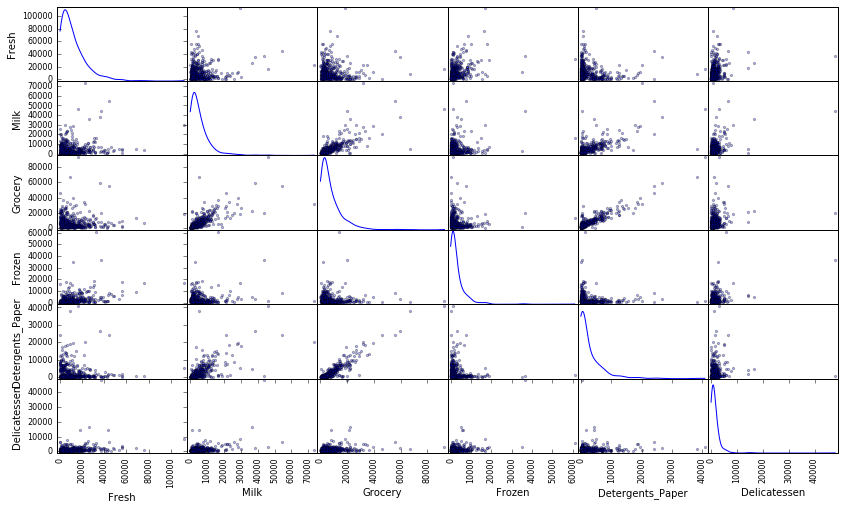

In [49]:
# Produce a scatter matrix for each pair of features in the data
def printScatter(data, size):
    pd.scatter_matrix(data, alpha = 0.3, figsize = size, diagonal = 'kde');
printScatter(data, (14,8))

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Features 'Detergents_Paper' and 'Grocery' show some degree of correlation, given that as the value of one increases, the value for the other one increases too. Their values seem to be directly proportional:

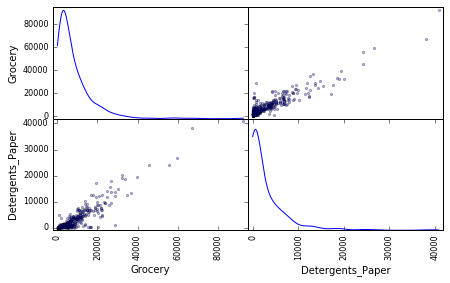

In [50]:
printScatter(data[['Grocery', 'Detergents_Paper']], (7,4))

Other than this, feature 'Milk' also seems to be related to the two features mentioned above:

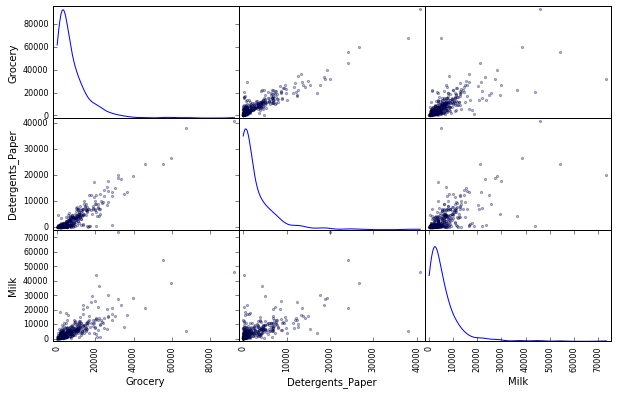

In [51]:
printScatter(data[['Grocery', 'Detergents_Paper','Milk']], (10,6))

Nevertheless, running the regressor removing 'Milk' from the training features, we get a training score of ≅-2. This makes us clear that it is not related to the rest of the features:


In [52]:
feature = 'Milk'
print featureRelevance(feature)

-2.20613966006


On the other hand, the feature 'Delicatessen' doesn't seem to be closely related to any other feature in the graph, given that it looks like if it is clustered, generating a small line. Additionally, the data doesn't seem to  be generated by a normal/gaussian distribution, beacuse most of its values are in the leftmost part of the graph. It looks more like the distribution is a F-distribution:

![](img/f_dist.gif)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

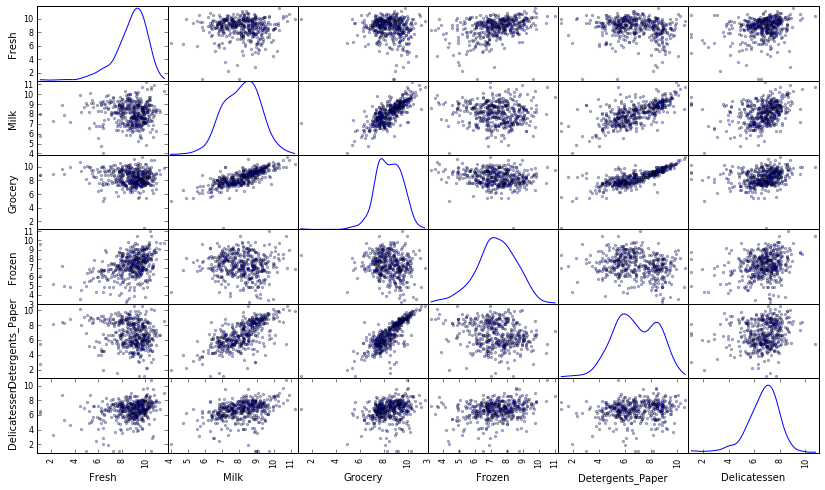

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.974179,8.887791,9.276596,6.779922,7.777374,7.918992
1,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = np.empty(0, dtype=int)

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[[feature]], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[[feature]], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5

    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outlier_df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outlier_df)
    outliers = np.concatenate((feature_outlier_df.index.values,outliers))


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[np.unique(outliers)]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are various datapoints considered outliers for more than one feature, based on the definition above:

In [14]:
import collections
repeated_outliers = [(item,count) for item, count in collections.Counter(outliers).items() if count > 1]
for (item, count) in repeated_outliers: print "Outlier %d was found %d times. " % (item, count) 


Outlier 128 was found 2 times. 
Outlier 154 was found 3 times. 
Outlier 65 was found 2 times. 
Outlier 66 was found 2 times. 
Outlier 75 was found 2 times. 


Yes, these data points should be removed from the dataset, given that they are outliers and may skew the results. Aditionally, all outliers were added to the *outliers* list to be removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

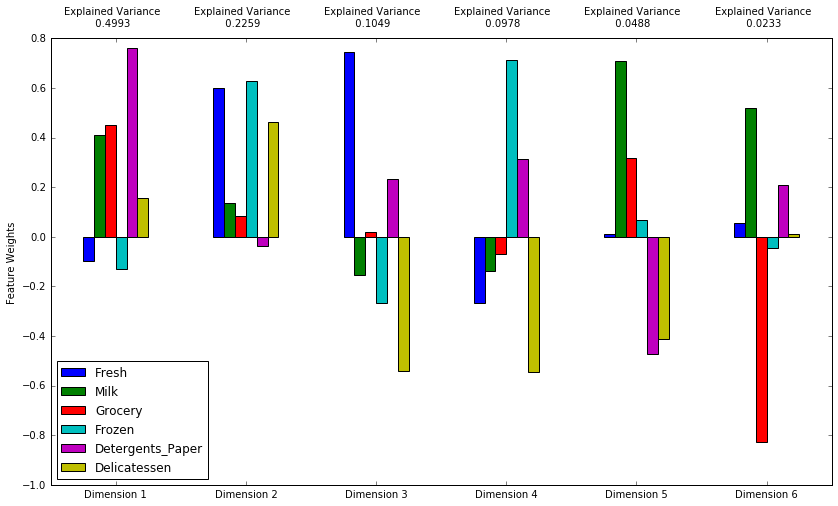

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The variance explained by the first PC is 0.4993 and the variance explained by the second PC is 0.2259. In total, the variance explained by both is 0.7252. The variance explained by the third PC is 0.1049 and by the fourth PC is 0.0978. In total, the variance explained by the first four principal components is 0.9279.

What the first dimension represents is that spending a high amount of money in Detergents_Paper is highly related to spending a fair amount in Milk and Grocery, and a lower amount in Delicatessen. Additionally it means you will spend a little less in Frozen and Fresh products.

For the second dimension, it represents that spending a considerable amount in frozen and fresh food, represents a moderate spending in delicatessen, and low money spendings in Milk and Grocery. Also a negative spending in Detergents_Paper.

The third dimension shows that spending a really high amount of money in Fresh food, a low quantity Detergents_Paper and an insignificant amount in grocery, represents a negative spending in Milk, Frozen and Delicatessen products.

Finally, a High amount of money spent in Frozen and moderate amount of money spent in Detergents_Paper, represent a negative spending in the rest of the features.

In general, the graph above shows how Milk, Grocery and Detergents_Paper features are the ones that best represent the input data, because of the high magnitudes that these coefficients (loadings) have. These three features are usually present together, which means that spending a considerable in one of these usually represents spending in the other two. On the other hand, Fresh and Frozen categories are related proportionally, and an increase in one usually means spending in the other too. Fresh, Frozen and Delicatessen are the second group of features that represents the best this data.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.6118,0.8751,0.4744,-1.2032,-0.1456,-0.0089
1,2.5602,-2.5161,-1.5836,0.1064,-0.9346,-0.1856
2,-2.4842,-0.0147,-0.9005,0.3315,-0.5147,-0.0357


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.6118,0.8751
1,2.5602,-2.5161
2,-2.4842,-0.0147


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means clustering algorithm runs fast, it will always converge, and it scales well to a large number of samples. This algorithm. On the other hand, a Gaussian Mixture Model clustering algorithm lets us identify the certainty of one point belonging to a cluster as a probability, which makes it much more flexible. It is also the fastest algorithm for mixture models.

The (modified) wholesale customer data uses features that come from semi-gaussian distributions, as seen with the scatter matrix. Given that we have a semi-normal distribution for our features, we know that a Gaussian Mixture Model clustering algorithm will work well. The algorithm chosen will be the Gaussian Mixture Model, given that with this domain knowledge we might get better results than using an agnostic algorithm such as K-means. Additionally we know that  the running time is not going to be too high (because the input is small) with this algorithm.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.mixture import GMM

num_components=2
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=num_components, random_state=77).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print score

0.443601474015


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The number of clusters that has the best silhouette score is n=2, as shown by the log printed by the following code:


In [45]:
def generateClusterFindScore(num_components):
    clusterer = GMM(n_components=num_components, random_state=77).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    return float(score)

max_score = 0
index = -1
for i in range(2,398):
    current = generateClusterFindScore(i)
    if current > max_score:
        max_score = current
        index = i
    print "Score for %d clusters: %f" % (i,current*100)
print "Max score found, with %d clusters: %f" % (index, max_score)

Score for 2 clusters: 44.360147
Score for 3 clusters: 35.729451
Score for 4 clusters: 29.232710
Score for 5 clusters: 26.799012
Score for 6 clusters: 30.712287
Score for 7 clusters: 27.958608
Score for 8 clusters: 33.174962
Score for 9 clusters: 30.180986
Score for 10 clusters: 22.385393
Score for 11 clusters: 20.866227
Score for 12 clusters: 16.688516
Score for 13 clusters: 11.364160
Score for 14 clusters: 21.650532
Score for 15 clusters: 18.363493
Score for 16 clusters: 17.502057
Score for 17 clusters: 16.336531
Score for 18 clusters: 15.826968
Score for 19 clusters: 14.768232
Score for 20 clusters: 17.530783
Score for 21 clusters: 16.441020
Score for 22 clusters: 8.511448
Score for 23 clusters: 8.185847
Score for 24 clusters: 8.273428
Score for 25 clusters: 13.243962
Score for 26 clusters: 13.956082
Score for 27 clusters: 11.979843
Score for 28 clusters: 9.358723
Score for 29 clusters: 6.022105
Score for 30 clusters: 8.748966
Score for 31 clusters: 9.670541
Score for 32 clusters: 5.

Additionally, this was possible given that there aren't many clustering sizes for this problem.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

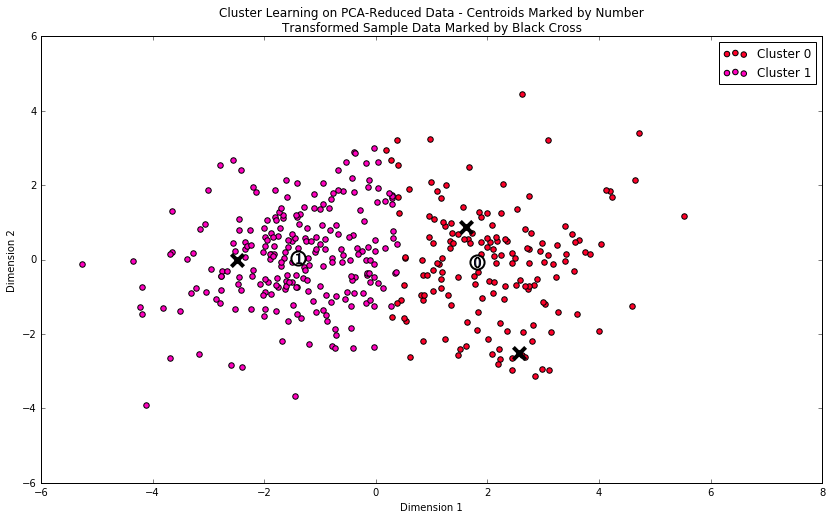

In [28]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0
Segment 1,8967.0,1920.0,2437.0,2081.0,309.0,741.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

The first customer segment could represent a supermarket, which has mostly Fresh, Milk and Grocery products. Where Frozen, Detergents_Paper and Delicatessen are not the main products they sell, but still they re-sell them in a considerable amount. Additionally, this customer segment could represent a restaurant which needs principally food products (again: fresh, milk and grocery items), in order to cook their dishes and sell their plates. They would need deergents and paper good for the logistics of the restaurant, and providing a healthy environment. They would sell also lots of milk related items, so probably it could be a bakery instead.

The second customer segment would be very probably a smaller restaurant which requires a big amount of Fresh food in order to provide that to their customers. These restaurants wouldn't be too big, so the amount of detergents_paper goods that they need is not as much, since they use it and don't need to sell it.  Additionally, they'd need grocery items and delicatessen goods in order to prepare their dishes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [53]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Sample point 0 predicted to be in Cluster 0

Sample point 1 predicted to be in Cluster 0

Sample point 2 predicted to be in Cluster 1

Yes, the predictions for each sample point are consistent with this, and according to the descriptions I gave earlier in the document. There might be a little variance between the amount of items that they need, but the average customer would be correct, according to the customer segments defined above.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Knowing which customer segments exists and how they behave could help to determine which customers would react positively/negatively with the delivery service change. For instance, if one segment required a lot of fresh food supplies (as it seems to be with customer segment \#2), supplying less frequently would mean that they might run out of supplies any day and won't be able to sell until they receive the next delivery service (more than 1 day later). On the other hand, supplying less days could benefit more a supermarket, since the process of re-supplying the stock would only be done 3 days (with a higher amount of supplies delivered now, each day), and now the staff could work on different things instead of just re-supplying the store. It could also nor affect positively or negatively the supermarket (customer segment \#1).

According to this reasinging, changing the delivery system won't affect all customers equally. It would affect the most to the customer segment that needs to re-stock their supplies as frequently as they can, specially when treating with fresh and frozen goods.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Since clustering allowed us to add structure (information) from the original dataset, the customer segment would be a new feature of the data. As stablished in the previous question response, each customer segment needs a proper delivery service that satisfies it's needs, based in the product spending information. This means each segments represents a delivery service.

With this information and the models generated we could do two things: First possibility is to use the same GaussianMixedModel to predict to which cluster (customer segment) each new customer will be assigned. And now store this new piece of information. Second possibility would be to train an unsupervised classifier that uses the customer segment as the target variable. It would be trained with the first input data (the one used in this project), using the clustering feature as the target variable. And now, with the supervised learner we would be able to predict the customer segment based on the estimated product spending for each new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

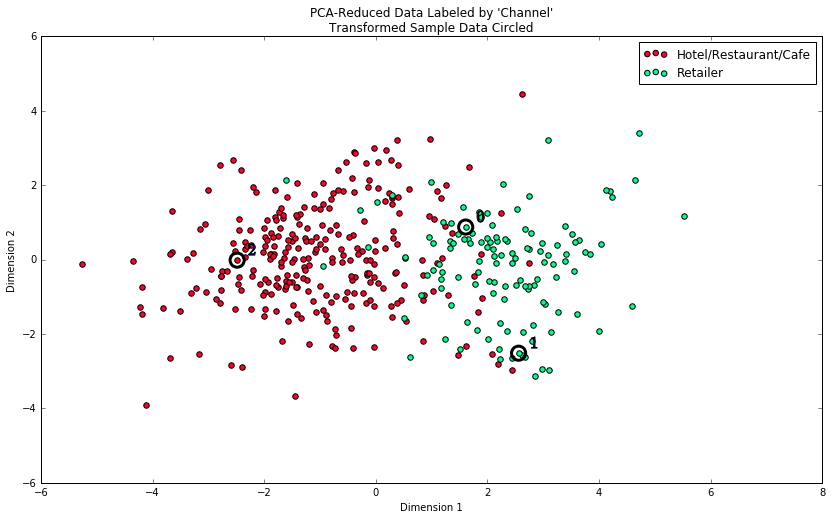

In [54]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The number of clusters and the separation of clusters that the clustering algorithm generated,resembles the underlying distribution of Hotel/Restaurant/Cafe customers. Some data points are included in the opposite segment in the underlying distribution, but most of them are divided in the same way as the clustering model describes.

Yes, there would be customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution. Cluster 0 would be classified as 'Hotels/Restaurants/Cafes', while Cluster 1 would be classified as 'Retailers'. As mentioned before, not all data points would be classified correctly, but most of them would. 

Additionally these classifications are consistent with my previous definition of the customer segments. Datapoints 0 and 1, which are included in cluster 1, were possibly thought to be retailers (supermarkets). On the other hand, dataset 2 is in cluded in cluster 0 was always thought to be a restaurant/cafe, which is the case for the underlying distribution shown in the graph.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.